## Import necessary Packages

In [2]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

import warnings 
warnings.filterwarnings('ignore')

# Load the Data into python with Pandas

In [4]:
df=pd.read_excel('Dataset.xlsx')

Data Exploration to 
*understand the data structure,statistics and quality of the dataset 
*visualize the data to gain insigts
*checking for missing values 

In [6]:
df.head(2)

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03


Checking for missing values 

In [8]:
missing_values=df.isnull().sum()
missing_values

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

In [9]:
# No missing values in the dataset

 Check for duplicate Values 

In [11]:
df.duplicated().any()

False

In [12]:
#No duplicate in the dataset

Statistical Overview of the dataset

In [14]:
stats_overview=df.describe()
stats_overview

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


#We have a balance dataset .The mean of the ChurnLabel which is 50% means
*that there are equal number of customers who Churn and also equal number of customers who did not Churn from the company*

How target variable 'churnLabel' and some of the other variables are distributed 

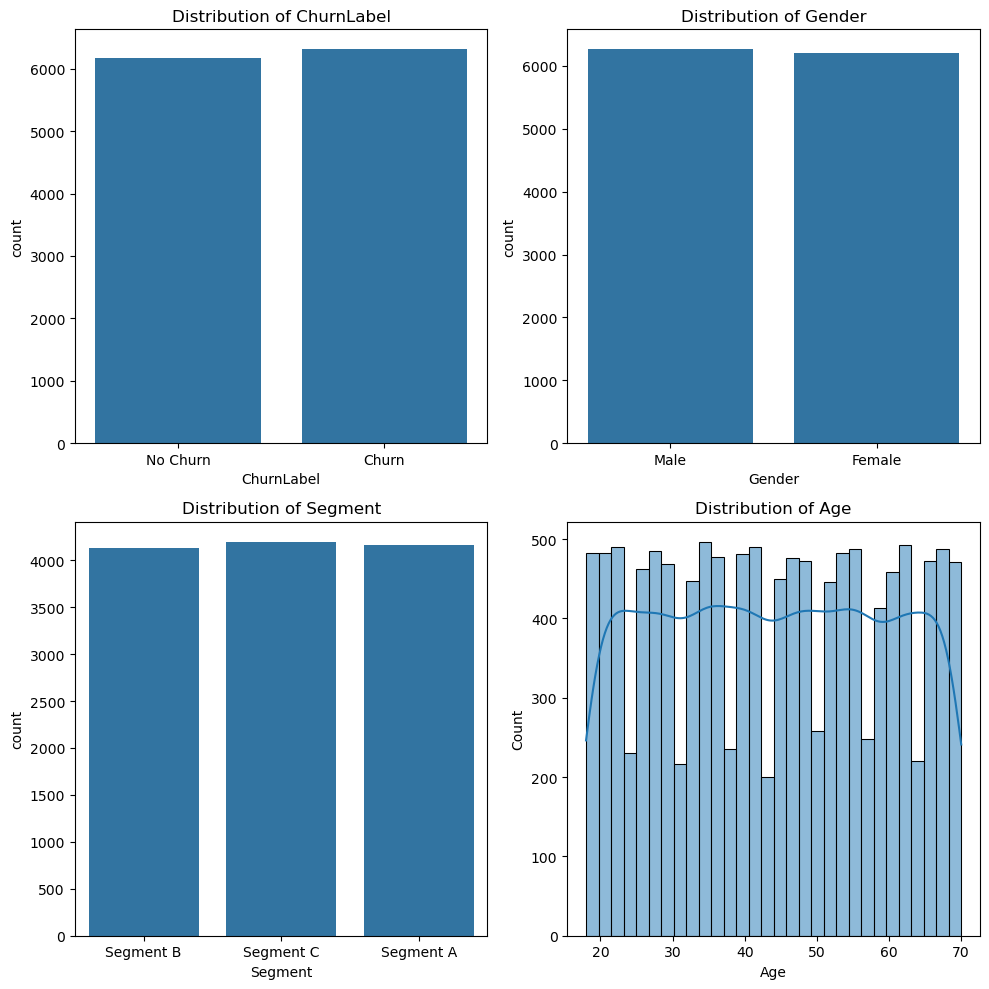

In [17]:
#Setting up the figures and the axis
fig,ax=plt.subplots(nrows=2, ncols=2, figsize=(10,10))

#plot the distribution of the target varibale ChurnLabel
sns.countplot(x='ChurnLabel',data=df,ax=ax[0,0])
ax[0,0].set_title('Distribution of ChurnLabel')
ax[0,0].set_xticklabels(['No Churn','Churn'])

#plot distribution for Gender
sns.countplot(x='Gender',data=df,ax=ax[0,1])
ax[0,1].set_title('Distribution of Gender')

#plot for distribution of Segment
sns.countplot(x='Segment',data=df,ax=ax[1,0])
ax[1,0].set_title('Distribution of Segment')

#plot for distribution of Age
sns.histplot(df['Age'],bins=30, ax=ax[1,1], kde=True)
ax[1,1].set_title('Distribution of Age')

plt.tight_layout()
plt.show()

In [18]:
#The total number of customers who Churn and Did not Churn are the sae
#The gender is also balance 
#Distribution segment is also balance in the various groups (4000 each)

# Correlation Analysis

In [20]:
corr=df.select_dtypes(include=np.number).corr()
corr

,CustomerID,Age,NPS,ChurnLabel
CustomerID,1.000000,-0.002670,-0.002513,0.001530
Age,-0.002670,1.000000,0.000006,0.010273
NPS,-0.002513,0.000006,1.000000,-0.540703
ChurnLabel,0.001530,0.010273,-0.540703,1.000000


#Among all the variables the churchLabel has an inverse correlation with NPS but its a moderate correlation and not that strong 

Exploring the nested columns 

In [23]:
# List out all the nested Columns
nested_columns =[
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

#print out the first value of the columns
w1, w2 = 25, 1000
for col in nested_columns:
    row = [col,df[col][0]]
    print('/n|{:<{w1}} | {:<{w2}} |'.format(*row, w1=w1, w2=w2))


/n|PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [24]:
#Convert the timestamp to datetime format so that it can be grouped for analysis

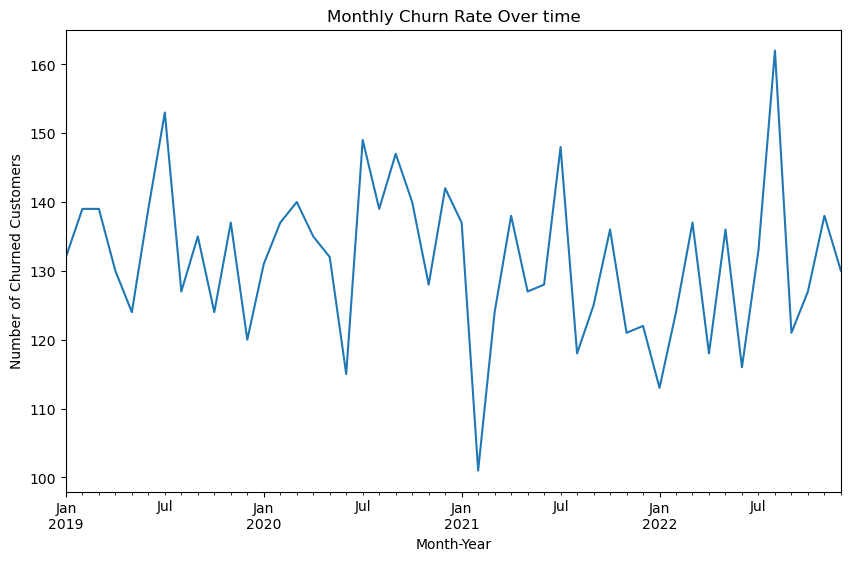

In [25]:
#timestamp to datetime format
df['Timestamp']=pd.to_datetime(df['Timestamp'])

#Extract the month-year from the Timestamp
df['MonthYear']=df['Timestamp'].dt.to_period('M')

#Grouped by monthyear and caaculate the churn rates
monthly_churn_rate=df.groupby('MonthYear')['ChurnLabel'].sum()


#Plot the churn rate over time
plt.figure(figsize=(10,6))
monthly_churn_rate.plot()
plt.title('Monthly Churn Rate Over time')
plt.ylabel('Number of Churned Customers')
plt.xlabel('Month-Year')
plt.show()




From the visualisation that there is no clear monthly and yearly pattern in the dataset 

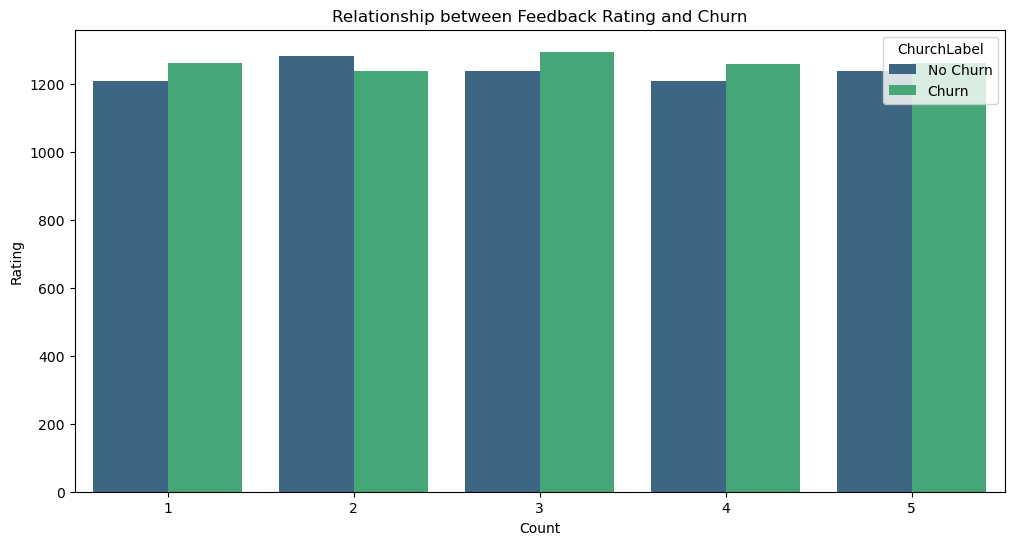

In [27]:
#Extracting rating from the feedback columns creating anew column for it
df['FeedbackRating']= df['Feedback'].apply(lambda x:eval(x)['Rating'])

#plotting the Relationship between Feedback Rating and Churn 
plt.figure(figsize=(12,6))
sns.countplot(x='FeedbackRating', data=df, hue='ChurnLabel', palette ='viridis')
plt.title('Relationship between Feedback Rating and Churn')
plt.ylabel('Rating')
plt.xlabel('Count')
plt.legend(title='ChurchLabel',loc='upper right',labels=['No Churn','Churn'])
plt.show()

From the visual there doesnt seem to be any indication that the feedback rating affected the churnLebel

## Data Preprocessing and Feature Engineering

*Data Preprocessing and feature Engneering*
creating new features that may have predictive power
converting categorical variable to numerical variables using encoding
scale or normalizing numerical variables if necessary
Split the data into train and test subsets
remove irrelevant features

In [31]:
#convert nested values from string format to list/ dictionaries using iteral_eval

In [32]:
#listed nested column
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

#Apply the literal_eval
for feature in nested_columns:
    df[feature] = df[feature].apply(literal_eval)

In [33]:
#PurchaseHistory
df['PurchaseProducts']= df['PurchaseHistory'].apply(lambda x:'|'.join([i['Product'] for i in x]))
df['PurchaseFrequency']= df['PurchaseHistory'].apply(lambda x:sum([i['Frequency'] for i in x]))
df['PurchaseValue']= df['PurchaseHistory'].apply(lambda x: sum([i['Value'] for i in x]))

#SubscriptionDetails Plan
df['SubscriptionPlan']= df['SubscriptionDetails'].apply(lambda x:x['Plan'])
df['SubscriptionStartDate']= df['SubscriptionDetails'].apply(lambda x:x['Start_Date'])
df['SubscriptionEndDate']= df['SubscriptionDetails'].apply(lambda x:x['End_Date'])
df['SubscriptionDuration']= (pd.to_datetime(df['SubscriptionEndDate'])-pd.to_datetime(df['SubscriptionStartDate'])).dt.days 

# Website
df['WebsitePageViews']= df['WebsiteUsage'].apply(lambda x:x['PageViews'])
df['WebsiteTimeSpent']= df['WebsiteUsage'].apply(lambda x:x['TimeSpent(minutes)'])

#EngagementMetrics
df['EngagementMetricsLogins']= df['EngagementMetrics'].apply(lambda x:x['Logins'])
df['EngagementMetricsFrequency']= df['EngagementMetrics'].apply(lambda x:x['Frequency'])

#Feedback
df['FeedbackRating']= df['Feedback'].apply(lambda x:x['Rating'])
df['FeedbackComment']= df['Feedback'].apply(lambda x:x['Comment'])

#MarketingCommunication
df['MarketingCommunicationNOofEmails']= df['MarketingCommunication'].apply(lambda x: len(x))
df['MarketingCommunicationOpenEmailClickDiff']=df['MarketingCommunication'].apply(
    lambda x: np.mean([
                 (pd.to_datetime(i['Email_Clicked'])\
                  -pd.to_datetime(i['Email_Opened'])).days for i in x
    ])
)
df['MarketingCommunicationSentOpenDiff']=df['MarketingCommunication'].apply(
    lambda x: np.mean([
                 (pd.to_datetime(i['Email_Opened'])\
                  -pd.to_datetime(i['Email_Sent'])).days for i in x
    ])
)


#Extraction from three columns 
*ServiceInteractions
*PaymentHistory
*ClickstreamData

*Check for the unique parameters/values inthese columns



In [35]:
#service_interaction_types
service_interaction_types=df['ServiceInteractions'].apply(lambda x: list(set([i['Type'] for i in x])))
service_interaction_types=service_interaction_types.to_list()
unique_service_interaction_type=[]
for i in service_interaction_types:
    unique_service_interaction_type.extend(i)
unique_service_interaction_type=list(set(unique_service_interaction_type))
print('All unique Service Interaction Types:',unique_service_interaction_type)


#payment Methods
payment_history_methods=df['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods=payment_history_methods.to_list()
unique_payment_history_methods=[]
for i in payment_history_methods:
    unique_payment_history_methods.extend(i)
unique_payment_history_methods=list(set(unique_payment_history_methods))
print('All unique Payment History Methods:',unique_payment_history_methods)


#ClickstreamData
clickstream_data_actions=df['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
clickstream_data_actions=clickstream_data_actions.to_list()
unique_clickstream_data_actions=[]
for i in clickstream_data_actions:
    unique_clickstream_data_actions.extend(i)
unique_clickstream_data_actions=list(set(unique_clickstream_data_actions))
print('All unique clickstream Data Actions:',unique_clickstream_data_actions)





All unique Service Interaction Types: ['Email', 'Chat', 'Call']
All unique Payment History Methods: ['PayPal', 'Bank Transfer', 'Credit Card']
All unique clickstream Data Actions: ['Add to Cart', 'Search', 'Click']


#Encode the three Columns 


In [37]:
#ServiceInteraction
for usit in unique_service_interaction_type:
    df[f'Serviceinteractions_(usit)'] = df['ServiceInteractions'].apply(lambda x: len([i for i in x if i['Type']== usit]))
    
#PaymentHistory
df['PaymentHistoryNoofLatePayments'] = df['PaymentHistory'].apply(lambda x: sum(i['Late_Payments'] for i in x))
df['PaymentHistoryAvgNoofLatePayments'] = df['PaymentHistory'].apply(lambda x: np.mean([i['Late_Payments'] for i in x]))

#clickstreamData
for ucda in unique_clickstream_data_actions:
    df[f'ClickstreamData_{ucda}'] = df['ClickstreamData'].apply(lambda x: len([i for i in x if i['Action']==ucda]))


new data after econdering 

In [39]:
df.head(2)

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,FeedbackComment,MarketingCommunicationNOofEmails,MarketingCommunicationOpenEmailClickDiff,MarketingCommunicationSentOpenDiff,Serviceinteractions_(usit),PaymentHistoryNoofLatePayments,PaymentHistoryAvgNoofLatePayments,ClickstreamData_Add to Cart,ClickstreamData_Search,ClickstreamData_Click
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,I move baby go small big. Office institution s...,8,319.0,818.0,1,40,13.333333,8,12,4
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,Wish what bag cut life. Statement might opport...,9,88.0,110.0,5,10,3.333333,8,7,9


In [40]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'PurchaseProducts', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEndDate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackComment',
       'MarketingCommunicationNOofEmails',
       'MarketingCommunicationOpenEmailClickDiff',
       'MarketingCommunicationSentOpenDiff', 'Serviceinteractions_(usit)',
       'PaymentHistoryNoofLatePayments', 'PaymentHistoryAvgNoofLatePayments',
       'ClickstreamData_Add to Cart', 'ClickstreamData_Search',
       'ClickstreamD

In [41]:
df_=df[[
    'Age',
    'Gender',
    'NPS',
    'ChurnLabel',
    'PurchaseFrequency',
    'SubscriptionPlan',
    'WebsitePageViews',
    'WebsiteTimeSpent', 
    'EngagementMetricsLogins',
    'EngagementMetricsFrequency',
    'FeedbackRating',
    'MarketingCommunicationNOofEmails',
    'MarketingCommunicationOpenEmailClickDiff',
    'MarketingCommunicationSentOpenDiff', 
    'Serviceinteractions_(usit)',
    'PaymentHistoryNoofLatePayments', 
    'ClickstreamData_Add to Cart',
    'ClickstreamData_Search',
    'ClickstreamData_Click',
    'SubscriptionDuration'
 ]]

df_.head()

,Age,Gender,NPS,ChurnLabel,PurchaseFrequency,SubscriptionPlan,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,EngagementMetricsFrequency,FeedbackRating,MarketingCommunicationNOofEmails,MarketingCommunicationOpenEmailClickDiff,MarketingCommunicationSentOpenDiff,Serviceinteractions_(usit),PaymentHistoryNoofLatePayments,ClickstreamData_Add to Cart,ClickstreamData_Search,ClickstreamData_Click,SubscriptionDuration
0,31,Male,3,1,38,Express,49,15,19,Weekly,1,8,319.0,818.0,1,40,8,12,4,871
1,66,Female,6,0,4,Pro,100,9,9,Weekly,2,9,88.0,110.0,5,10,8,7,9,290
2,36,Female,3,0,14,Essential,1,97,19,Monthly,4,8,117.0,333.0,1,8,2,7,3,319
3,62,Female,1,1,28,Smart,25,31,4,Daily,1,10,423.0,159.0,17,79,15,16,16,803
4,68,Female,3,0,39,Basic,77,51,12,Weekly,3,7,96.0,193.0,4,2,17,4,9,580


In [42]:
df_.columns

Index(['Age', 'Gender', 'NPS', 'ChurnLabel', 'PurchaseFrequency',
       'SubscriptionPlan', 'WebsitePageViews', 'WebsiteTimeSpent',
       'EngagementMetricsLogins', 'EngagementMetricsFrequency',
       'FeedbackRating', 'MarketingCommunicationNOofEmails',
       'MarketingCommunicationOpenEmailClickDiff',
       'MarketingCommunicationSentOpenDiff', 'Serviceinteractions_(usit)',
       'PaymentHistoryNoofLatePayments', 'ClickstreamData_Add to Cart',
       'ClickstreamData_Search', 'ClickstreamData_Click',
       'SubscriptionDuration'],
      dtype='object')

In [43]:
df_.loc[0]

Age                                              31
Gender                                         Male
NPS                                               3
ChurnLabel                                        1
PurchaseFrequency                                38
SubscriptionPlan                            Express
WebsitePageViews                                 49
WebsiteTimeSpent                                 15
EngagementMetricsLogins                          19
EngagementMetricsFrequency                   Weekly
FeedbackRating                                    1
MarketingCommunicationNOofEmails                  8
MarketingCommunicationOpenEmailClickDiff      319.0
MarketingCommunicationSentOpenDiff            818.0
Serviceinteractions_(usit)                        1
PaymentHistoryNoofLatePayments                   40
ClickstreamData_Add to Cart                       8
ClickstreamData_Search                           12
ClickstreamData_Click                             4
Subscription

# Checking the number of unique values 

In [45]:
print('Total Dataset Langth:',len(df_))

df_[['Gender', 'SubscriptionPlan', 'EngagementMetricsFrequency']].nunique()

Total Dataset Langth: 12483


Gender                         2
SubscriptionPlan              20
EngagementMetricsFrequency     3
dtype: int64

## Ecoding the data  Gender,Subscriptionplan,engagementmetricsfequency

In [47]:
#Gender Encoding
gender_map={'Male': 0, 'Female': 1}

#Subscription_Plan Encoding
unique_subscription_plans= df_['SubscriptionPlan'].unique()
subscription_plan_map = {unique_subscription_plans[i]: i for i in range(len(unique_subscription_plans))}


#EngagementMetricsFrequency Encoding 
unique_engagement_frequency = df_['EngagementMetricsFrequency'].unique()
engagement_frequency_map = {unique_engagement_frequency[i]: i for i in range(len(unique_engagement_frequency))}


#Encode
df_.loc[:,'Gender']= df_.loc[:,'Gender'].map(gender_map)
df_.loc[:,'SubscriptionPlan']= df_.loc[:,'SubscriptionPlan'].map(subscription_plan_map)
df_.loc[:,'EngagementMetricsFrequency']= df_.loc[:,'EngagementMetricsFrequency'].map(engagement_frequency_map)


In [48]:
df_.loc[0]

Age                                            31
Gender                                          0
NPS                                             3
ChurnLabel                                      1
PurchaseFrequency                              38
SubscriptionPlan                                0
WebsitePageViews                               49
WebsiteTimeSpent                               15
EngagementMetricsLogins                        19
EngagementMetricsFrequency                      0
FeedbackRating                                  1
MarketingCommunicationNOofEmails                8
MarketingCommunicationOpenEmailClickDiff    319.0
MarketingCommunicationSentOpenDiff          818.0
Serviceinteractions_(usit)                      1
PaymentHistoryNoofLatePayments                 40
ClickstreamData_Add to Cart                     8
ClickstreamData_Search                         12
ClickstreamData_Click                           4
SubscriptionDuration                          871


In [49]:
df_.head()

,Age,Gender,NPS,ChurnLabel,PurchaseFrequency,SubscriptionPlan,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,EngagementMetricsFrequency,FeedbackRating,MarketingCommunicationNOofEmails,MarketingCommunicationOpenEmailClickDiff,MarketingCommunicationSentOpenDiff,Serviceinteractions_(usit),PaymentHistoryNoofLatePayments,ClickstreamData_Add to Cart,ClickstreamData_Search,ClickstreamData_Click,SubscriptionDuration
0,31,0,3,1,38,0,49,15,19,0,1,8,319.0,818.0,1,40,8,12,4,871
1,66,1,6,0,4,1,100,9,9,0,2,9,88.0,110.0,5,10,8,7,9,290
2,36,1,3,0,14,2,1,97,19,1,4,8,117.0,333.0,1,8,2,7,3,319
3,62,1,1,1,28,3,25,31,4,2,1,10,423.0,159.0,17,79,15,16,16,803
4,68,1,3,0,39,4,77,51,12,0,3,7,96.0,193.0,4,2,17,4,9,580


## Plot correlation matrix

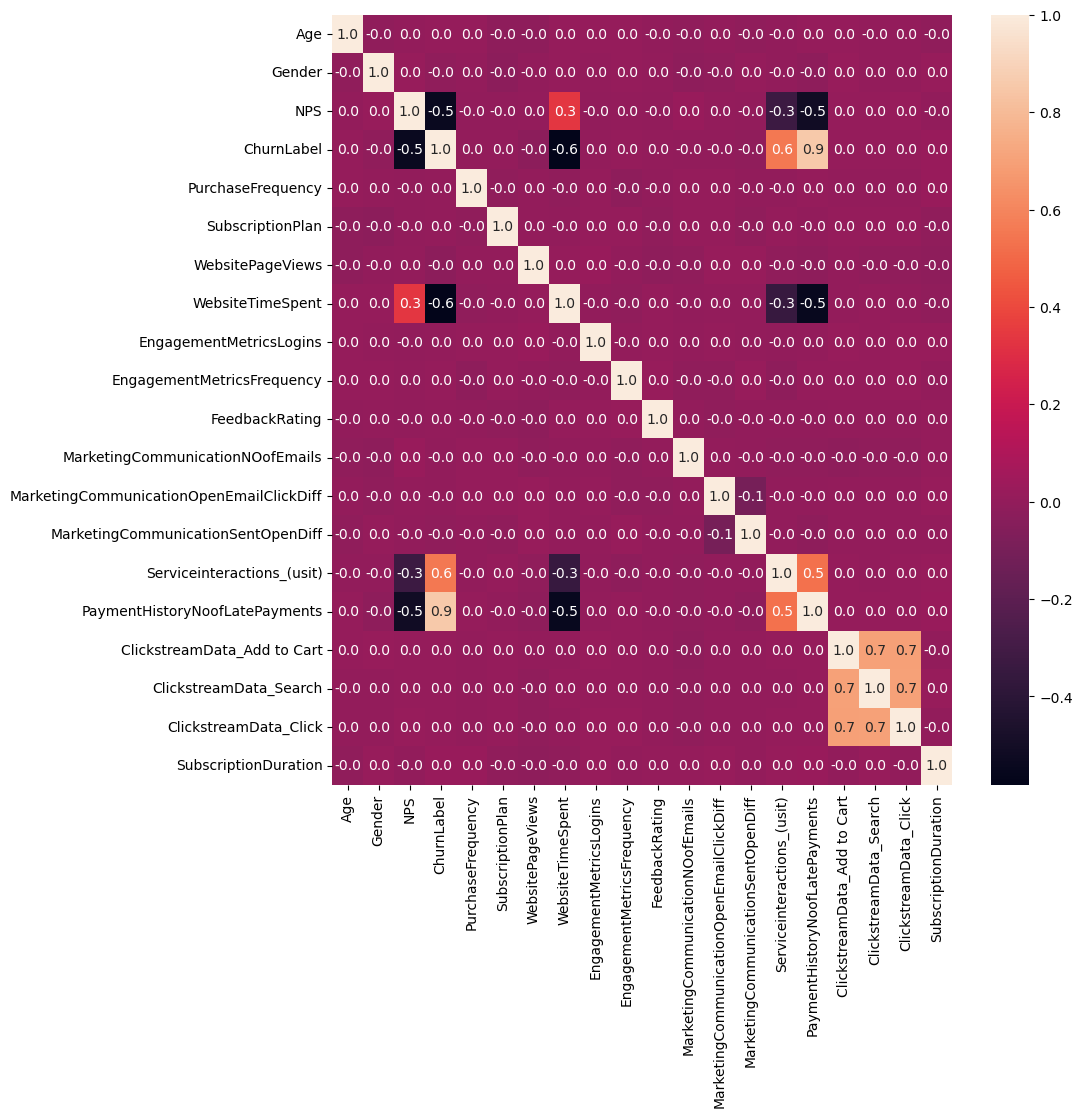

In [51]:
df_corr = df_.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr,annot=True, fmt='.1f',ax=ax)
plt.show()
        

Split and train,test and validate datasets

In [53]:
x=df_.drop(columns=['ChurnLabel'])
y=df_['ChurnLabel']

x_train, x_other,y_train,y_other = train_test_split(x,y, train_size=0.80, random_state=42)
x_test,x_val,y_test,y_val= train_test_split(x_other, y_other,test_size=0.3,random_state=42)

In [54]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_val=ss.transform(x_val)
x_test=ss.transform(x_test)

## Modelling 

using logistic regression and decision tree
metrics 
-accuracy score
-precision score
-recall score
-f1 score 

In [57]:
def evaluate (x,y, model,subset=''):
    y_pred=model.predict(x)

    print (f'{subset} Accuracy Score : {accuracy_score(y_pred, y)}')
    print (f'{subset}  Precision score : {precision_score(y_pred, y)}')
    print (f'{subset}  recall score : {recall_score(y_pred, y)}')
    print (f'{subset}  F1 score : {f1_score(y_pred, y)}')
    

### Modelling with Logistic Regression

In [59]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

#Evaluate the model with the train dnd validation subsets
evaluate(x_train,y_train,lr, 'Train')
evaluate(x_val,y_val,lr, 'Validation')

Train Accuracy Score : 0.9709593430803124
Train  Precision score : 0.965938176806458
Train  recall score : 0.9767071471232331
Train  F1 score : 0.9712928133042962
Validation Accuracy Score : 0.968
Validation  Precision score : 0.9696969696969697
Validation  recall score : 0.9643835616438357
Validation  F1 score : 0.967032967032967


### Modelling with Decision Tree

In [61]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

#Evaluate the model with the train dnd validation subsets
evaluate(x_train,y_train,dt, 'Train')
evaluate(x_val,y_val,dt, 'Validation')

Train Accuracy Score : 1.0
Train  Precision score : 1.0
Train  recall score : 1.0
Train  F1 score : 1.0
Validation Accuracy Score : 0.944
Validation  Precision score : 0.9449035812672176
Validation  recall score : 0.9397260273972603
Validation  F1 score : 0.9423076923076923


the decision tree had a score of 1.0 for all the metrics which means it fit in perfectly and we can assume that there is some form of overfitting because it quiet real to have this 

In [63]:
#Dumping the model 
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)

#Evaluate the model with the train dnd validation subsets
evaluate(x_train,y_train,dt, 'Train')
evaluate(x_val,y_val,dt, 'Validation')

Train Accuracy Score : 0.9759663528940516
Train  Precision score : 0.9755857452254381
Train  recall score : 0.977124827450207
Train  F1 score : 0.9763546798029556
Validation Accuracy Score : 0.9693333333333334
Validation  Precision score : 0.9724517906336089
Validation  recall score : 0.9644808743169399
Validation  F1 score : 0.9684499314128944


## Evaluation ont the test set

In [65]:
evaluate (x_test,y_test,lr,'LogisticRegression Test')
evaluate (x_test,y_test,dt,'DecisionTreeClassifier Test')

LogisticRegression Test Accuracy Score : 0.9685174585002863
LogisticRegression Test  Precision score : 0.963302752293578
LogisticRegression Test  recall score : 0.9733487833140209
LogisticRegression Test  F1 score : 0.968299711815562
DecisionTreeClassifier Test Accuracy Score : 0.9736691471093303
DecisionTreeClassifier Test  Precision score : 0.9736238532110092
DecisionTreeClassifier Test  recall score : 0.9736238532110092
DecisionTreeClassifier Test  F1 score : 0.9736238532110092


DecisionTreeClassifier has the better of results for our model using the metrics 

## Confusion Matrix

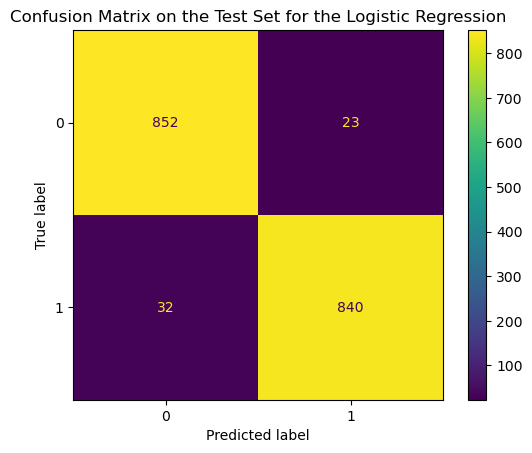

In [71]:
lr_y_pred=lr.predict(x_test)
logistic_regression_confusion_matrix = confusion_matrix(y_test,lr_y_pred)

display=ConfusionMatrixDisplay(confusion_matrix=logistic_regression_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on the Test Set for the Logistic Regression')
plt.show()

The model was able to predict 840  coustomers who chrun correcly and 852 customers who didnot churn from the dataset correctly while it predict wrongly 32 customers who churn and labelled it has customers who didnot churn. 

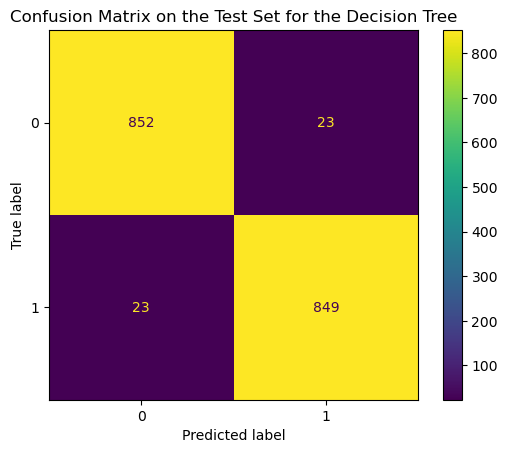

In [75]:
dt_y_pred=dt.predict(x_test)
decision_tree_confusion_matrix = confusion_matrix(y_test,dt_y_pred)

display=ConfusionMatrixDisplay(confusion_matrix=decision_tree_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on the Test Set for the Decision Tree')
plt.show()

with the decision tree matrix the numbers have improved and its predict right the customers who churn and the not churn 849 and 852 correctly with the data and wrongly placed 23 the customers who churn and didnot churn position 

with the confusion matrix the Decision tree is better at identifying customers that churn than logistic regression 

## Conclusion

the most important features to determine which customers are likely to churn and which customers are not likely to churn :
-the number of service interations the customer has 
-the number of times the customer has made late payment
-the amount of time spent on the company's website
-the Net Promoter Score (NPS).